#### Contributor: Aishwarya Gulhane

In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Checking if the output directory exists
output_dir = "/home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts"
os.makedirs(output_dir, exist_ok=True)

# Loading Processed Dataset
sales_data = pd.read_csv("/home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/data/Processed/01_data_cleaning.csv")
sales_data



,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Week,weekday,Region,TotalSales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019,12,50,Monday,Europe,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019,12,50,Monday,Europe,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019,12,50,Monday,Europe,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019,12,50,Monday,Europe,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019,12,50,Monday,Europe,71.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531090,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,2018,12,48,Saturday,Europe,-37.92
531091,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,2018,12,48,Saturday,Europe,-42.27
531092,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,2018,12,48,Saturday,Europe,-11.74
531093,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,2018,12,48,Saturday,Europe,-65.40


## COHORT ANALYSIS

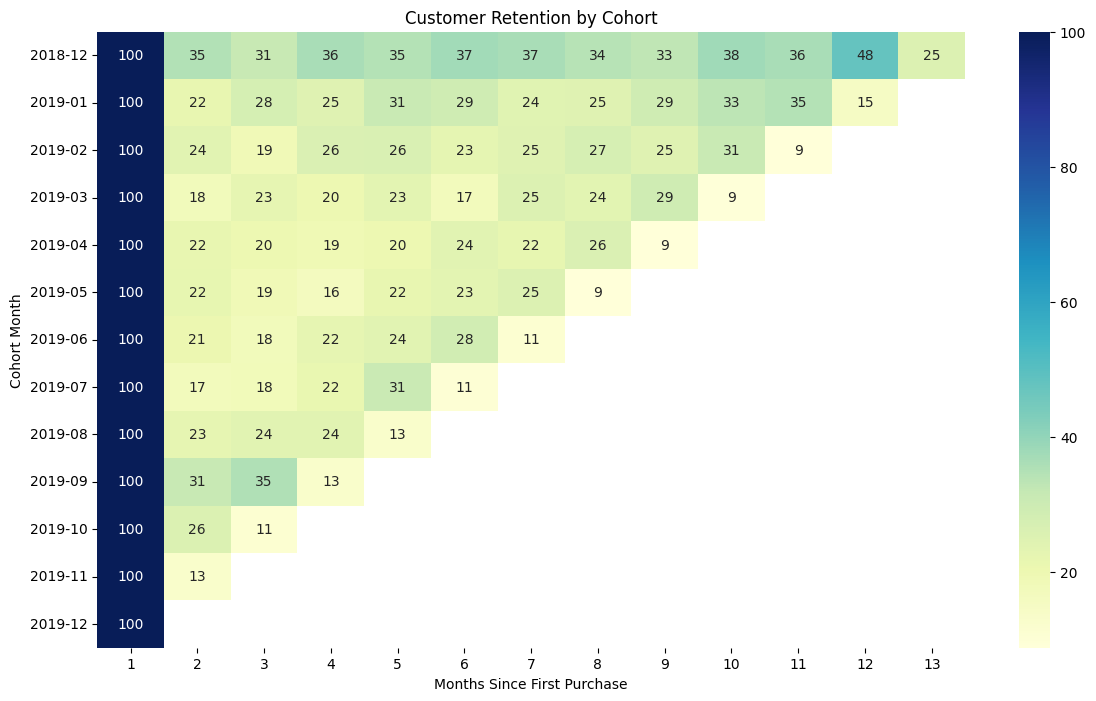

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/cohort_analysis_customer_retention.png

The heatmap above visualizes customer retention over time, where:
- Rows represent each cohort month (the first month the customers purchased).
- Columns represent the number of months since the cohort's first purchase.
- Cell values show the percentage of unique customers retained in each subsequent month.



In [5]:
# Date column in datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Extracting Cohort Index
sales_data['OrderMonth'] = sales_data['Date'].dt.to_period('M')
# Grouping customers based on the month they joined
sales_data['CohortMonth'] = sales_data.groupby('CustomerNo')['OrderMonth'].transform('min')

# Getting the number of months between OrderMonth and CohortMonth
sales_data['CohortIndex'] = (sales_data['OrderMonth'].dt.year - sales_data['CohortMonth'].dt.year) * 12 + (sales_data['OrderMonth'].dt.month - sales_data['CohortMonth'].dt.month) + 1

# Counting unique customers per cohort per CohortIndex
cohort_data = sales_data.groupby(['CohortMonth', 'CohortIndex'])['CustomerNo'].nunique().reset_index()

# Pivot to create cohort retention table
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerNo')

# Dividing each row by its first column (month 1) to get percentages
cohort_percent = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0) * 100

# Plot retention heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cohort_percent, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Customer Retention by Cohort')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.yticks(rotation=0)
# Save the figure
output_file = os.path.join(output_dir, "cohort_analysis_customer_retention.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print(f"output saved at: {output_file}")

print("""
The heatmap above visualizes customer retention over time, where:
- Rows represent each cohort month (the first month the customers purchased).
- Columns represent the number of months since the cohort's first purchase.
- Cell values show the percentage of unique customers retained in each subsequent month.
""")




#### Observations:
1. **Strongest Retention Cohort:**
- December 2018 has the strongest retention: 35% stayed in Month 2, 36% in Month 4, and 48% came back even in Month 12.
- Suggests successful acquisition or better onboarding strategies in this period.

2. **Decline Over Time:**
- Later cohorts (from mid to late 2019) show a steep drop in retention:E.g., June 2019 cohort drops from 100% to 18% in Month 3, and 11% by Month 7.
- December 2019: Only 13% retention by Month 2.

3. **Spike:**
- September 2019 cohort shows: 31% in Month 2 → 35% in Month 3 → drop to 13% in Month 4.
- Could indicate a successful short-term campaign or promo that didn’t sustain.

4. **Incomplete Data:**
- Recent cohorts (Oct–Dec 2019) have fewer months tracked, so it’s too early to evaluate long-term retention.


#### Recommendations

1. **Repeat What Worked in Dec 2018**
   Look into what was done differently in December 2018 — like marketing, product offers, pricing, or how new customers were welcomed. Try to apply those winning strategies again.

2. **Stop Drop-Off in Months 2–4**
   Most customers stop coming back after the first month. Focus on Months 2 to 4 to bring them back — maybe through emails, reminders, offers, or better support.

3. **Try Loyalty Programs or Personalized Messages**
   Many customers from mid-2019 left quickly. To keep them longer, try loyalty rewards or more personal outreach (like offers based on what they bought earlier).

4. **Check the Spike in Sep 2019**
   The September 2019 group suddenly became active in Month 3. What caused it — was there a promo or event? If yes, try to replicate strategy again with other groups.
